Exercise 1. 
By clustering a dataset, we try to find groups of instances that the set is composed of. Often, these
groups can reveal insights on the processes of how the data was created – processes that are hidden or
unclear beforehand. Imagine the following (toy example) situation: In the dataset in the table below,
instances are given with two features 𝑥 and 𝑦. The data is created by two processes (1 and 2). In
a real setting, these processes would be unknown and the clustering algorithm is supposed to find
appropriate groups. Consider the following dataset (at first without the actual process information).
𝑥 3 3 4 4 5 6 7 7 8 9 1 2 2 3 4 5 5 6 7 7
𝑦 1 2 2 3 3 4 4 6 5 7 3 4 5 6 6 7 8 8 8 9
process 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
1. Based only on the features, how many clusters would you expect?
Hard to tell
2. Knowing the generating processes, how many clusters do you expect?
2
3. What could be possible obstacles that might lead to clusterings that do not fit the processes?
there might be too many clusters
4. Cluster the dataset using 𝑘-means with 𝑘 “2, 3, 4.

5. When clustering the data with 𝑘-means, which problems occur?
6. Following your insight on 𝑘-means, what do expect regarding conclusions about the two
processes?
7. Based on the observations of 𝑘-means with 𝑘 “2, what would we recommend?

In [1]:
import time   # measure the run time of k-Means
import numpy as np # handle arrays/vectors
import matplotlib.pyplot as plt # plot

from sklearn.cluster import KMeans  # k-Means
from sklearn.cluster import MiniBatchKMeans # A sometimes faster version of k-Means

In [4]:
# Given data
x = [3, 3, 4, 4, 5, 6, 7, 7, 8, 9, 1, 2, 2, 3, 4, 5, 5, 6, 7, 7]
y = [1, 2, 2, 3, 3, 4, 4, 6, 5, 7, 3, 4, 5, 6, 6, 7, 8, 8, 8, 9]
process = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# Create a 2D array (matrix)
X = np.array([x, y, process]).T  # Transpose to get correct shape

print(X)

[[3 1 1]
 [3 2 1]
 [4 2 1]
 [4 3 1]
 [5 3 1]
 [6 4 1]
 [7 4 1]
 [7 6 1]
 [8 5 1]
 [9 7 1]
 [1 3 2]
 [2 4 2]
 [2 5 2]
 [3 6 2]
 [4 6 2]
 [5 7 2]
 [5 8 2]
 [6 8 2]
 [7 8 2]
 [7 9 2]]


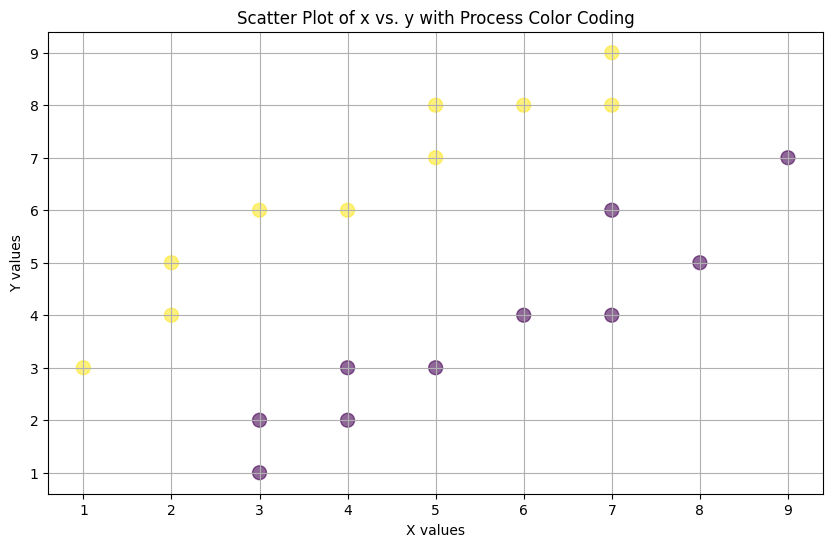

In [22]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2], cmap='viridis', s=100, alpha=0.6)

# Labeling the axes
plt.title('Scatter Plot of x vs. y with Process Color Coding')
plt.xlabel('X values')
plt.ylabel('Y values')

# Show plot
plt.grid()
plt.show()

In [52]:
kmeans_pp = KMeans(
    n_clusters=4, # find 3 clusters
    n_init=20, # find the best clustering out of 20 tries with different initialization
    init='k-means++', # use k-means++ initialization
    max_iter=300, tol=0.0001) ## abort after 300 iterations or if the cost function does not change more than tol

In [53]:
start_time=time.time()
cluster_assignments=kmeans_pp.fit_predict(X)
print(time.time()-start_time)

0.10633611679077148


In [54]:
def k_means_report(kmeans):
    print(f'k-means \n * has seen {kmeans.n_features_in_} features,\n \
* used {kmeans.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans.inertia_}.')

In [55]:
k_means_report(kmeans_pp)

k-means 
 * has seen 3 features,
 * used 2 iterations, and 
 * resulted in an inertia of 35.6.


In [56]:
kmeans_pp.cluster_centers_

array([[3.8, 2.2, 1. ],
       [6. , 8. , 2. ],
       [2.4, 4.8, 2. ],
       [7.4, 5.2, 1. ]])

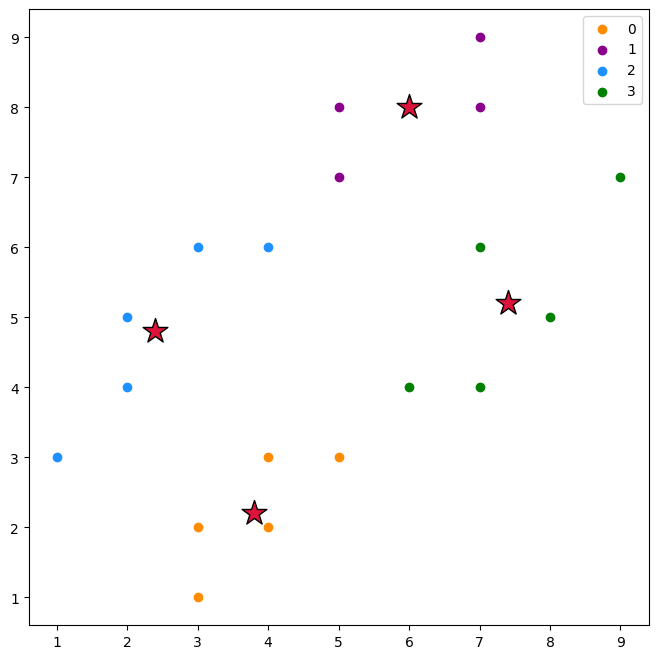

In [58]:

colors = ['darkorange', 'darkmagenta', 'dodgerblue', 'green']  # Add a fourth color

def print_clustering(X, kmeans, cluster_assignments):
    plt.figure(figsize=(8, 8))

#    for i in range(0,len(np.unique(cluster_assignments))):
    for i in np.unique(cluster_assignments):
        X_sub=X[cluster_assignments==i, :]
        plt.scatter(X_sub[:, 0], X_sub[:, 1], c=colors[i], label=i)
    
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1],
        s=350, marker='*', c='crimson', edgecolor='black'
    )

    plt.legend()
    
print_clustering(X, kmeans_pp, cluster_assignments)